In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## 無作為なdataを生成する
$\sin(0) + 1 \le x \le \sin(20) + 1$

$0 \le x \le 2$

ただし, それぞれ最大1の誤差がある

In [2]:
t = np.arange(0, 1000)
x = np.sin(0.02 * t) + 1 + np.random.rand(1000)
df = pd.DataFrame(x)
df.head()

,0
0,1.249634
1,1.650727
2,1.850364
3,1.605126
4,2.013599


## 訓練用とテスト用に分ける

In [3]:
values = df.values
train, test = values[0:800, :], values[800:1000, :]

## dataを行列に変換する

In [4]:
def convertToMatrix(data, step=4):
    X, Y = [], []
    for i in range(len(data) - step):
        d = i + step
        X.append(data[i:d])
        Y.append(data[d])
    return np.array(X), np.array(Y)

In [5]:
trainX, trainY = convertToMatrix(train, 6)
testX, testY = convertToMatrix(test, 6)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## Modelを作成する

In [6]:
model = Sequential()

2021-07-27 16:52:00.580166: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Modelにlayerを追加する

In [7]:
model.add(SimpleRNN(units=32, input_shape=(1, 6), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

## Modelの設定を行う
- loss: 損失関数には平均二乗誤差を用いる
- optimizer: 最適化アルゴリズムにはRMSPropを用いる

In [8]:
model.compile(loss='mean_squared_error', optimizer='rmsprop')

## 作成したModelの概要を見る

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1248      
_________________________________________________________________
dense (Dense)                (None, 8)                 264       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________


## 学習

In [10]:
model.fit(trainX, trainY, epochs=30, batch_size=500, verbose=2)

2021-07-27 16:52:00.874459: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
2/2 - 1s - loss: 6.5795
Epoch 2/30
2/2 - 0s - loss: 5.3078
Epoch 3/30
2/2 - 0s - loss: 4.5224
Epoch 4/30
2/2 - 0s - loss: 3.9132
Epoch 5/30
2/2 - 0s - loss: 3.4006
Epoch 6/30
2/2 - 0s - loss: 2.9563
Epoch 7/30
2/2 - 0s - loss: 2.5653
Epoch 8/30
2/2 - 0s - loss: 2.2243
Epoch 9/30
2/2 - 0s - loss: 1.9293
Epoch 10/30
2/2 - 0s - loss: 1.6676
Epoch 11/30
2/2 - 0s - loss: 1.4357
Epoch 12/30
2/2 - 0s - loss: 1.2248
Epoch 13/30
2/2 - 0s - loss: 1.0334
Epoch 14/30
2/2 - 0s - loss: 0.8647
Epoch 15/30
2/2 - 0s - loss: 0.7173
Epoch 16/30
2/2 - 0s - loss: 0.5897
Epoch 17/30
2/2 - 0s - loss: 0.4825
Epoch 18/30
2/2 - 0s - loss: 0.3937
Epoch 19/30
2/2 - 0s - loss: 0.3224
Epoch 20/30
2/2 - 0s - loss: 0.2665
Epoch 21/30
2/2 - 0s - loss: 0.2240
Epoch 22/30
2/2 - 0s - loss: 0.1923
Epoch 23/30
2/2 - 0s - loss: 0.1695
Epoch 24/30
2/2 - 0s - loss: 0.1539
Epoch 25/30
2/2 - 0s - loss: 0.1435
Epoch 26/30
2/2 - 0s - loss: 0.1364
Epoch 27/30
2/2 - 0s - loss: 0.1311
Epoch 28/30
2/2 - 0s - loss: 0.1272
E

## 予測する

In [11]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
predicted = np.concatenate((trainPredict, testPredict), axis=0)

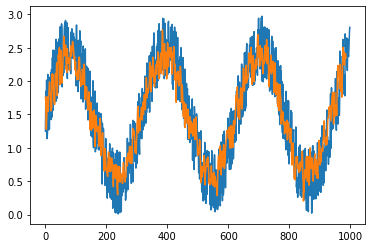

In [12]:
plt.figure()
plt.plot(x)
plt.plot(predicted)